# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [433]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mousestudy_combined = pd.merge(mouse_metadata, study_results, how ='outer')


# Display the data table for preview
mousestudy_combined.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [434]:
# Checking the number of mice.
mice = mousestudy_combined["Mouse ID"].value_counts()
number_of_mice=len(mice)
number_of_mice

249

In [435]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mousestudy_combined.loc[mousestudy_combined.duplicated(subset=['Mouse ID', 
                                                                                'Timepoint',]),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [436]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_id=pd.DataFrame(duplicate_mice)
duplicate_mouse_id

,0
0,g989


In [437]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = mousestudy_combined[mousestudy_combined['Mouse ID'].isin(duplicate_mice)==False]


In [438]:
# Checking the number of mice in the clean DataFrame.
total_mice = clean_df["Mouse ID"].value_counts()
total_mice_clean=len(total_mice)
total_mice_clean

248

## Summary Statistics

In [439]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

regimen_mean = clean_df.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
regimen_mean


regimen_median = clean_df.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
regimen_median


regimen_variance = clean_df.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
regimen_variance


regimen_std = clean_df.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
regimen_std

regimen_sem = clean_df.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]
regimen_sem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [440]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

summary_stats_table = pd.DataFrame({"Mean": regimen_mean, "Median":regimen_median, "Variance":regimen_variance, "Standard Deviation": regimen_std, "SEM": regimen_sem})

summary_stats_table

# Using the aggregation method, produce the same summary statistics in a single line.


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

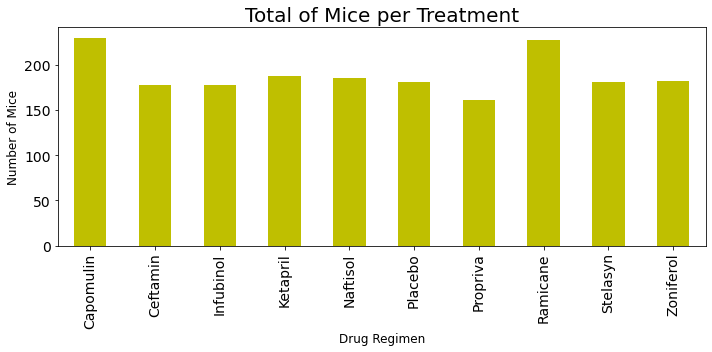

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

In [441]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
count_mice_per_timepoint = mousestudy_combined.groupby(["Drug Regimen"]).count()["Mouse ID"] 


plot_pandas = count_mice_per_timepoint.plot.bar(figsize=(10,5), color='y',fontsize = 14)
count_mice_per_timepoint
plt.xlabel("Drug Regimen",fontsize = 12)
plt.ylabel("Number of Mice",fontsize = 12)
plt.title("Total of Mice per Treatment",fontsize = 20)

plt.tight_layout()
plt.show()

count_mice_per_timepoint


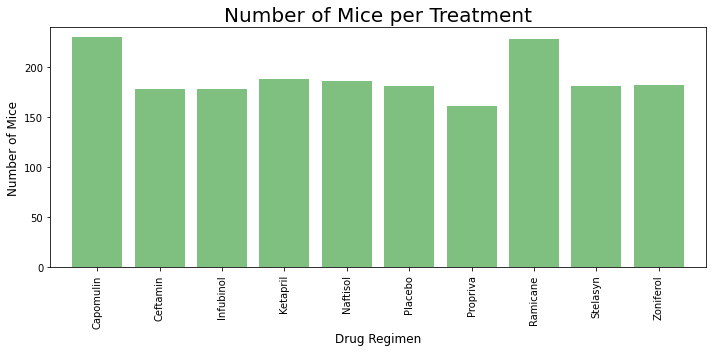

In [442]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

mice_list =(mousestudy_combined.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()


x_axis = np.arange(len(count_mice_per_timepoint))

fig1, ax1 = plt.subplots(figsize=(10, 5))
plt.bar(x_axis, mice_list, color='g', alpha=0.5, align='center')

tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(mice_list)+10)

plt.title("Number of Mice per Treatment",fontsize = 20)
plt.xlabel("Drug Regimen",fontsize = 12)
plt.ylabel("Number of Mice",fontsize = 12)

plt.tight_layout()



In [443]:
#find number/percentage of males and females

groupby_sex = mousestudy_combined.groupby(["Mouse ID","Sex"])
groupby_sex
sex_df = pd.DataFrame(groupby_sex.size())

# Create the dataframe with total count of Female and Male mice
mouse_gender = pd.DataFrame(sex_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"]

# create and format the percentage of female vs male
mouse_gender["Percentage of Sex"] = (100*(mouse_gender["Total Count"]/mouse_gender["Total Count"].sum()))

# format the "Percentage of Sex" column
mouse_gender["Percentage of Sex"] = mouse_gender["Percentage of Sex"]

# gender_df
mouse_gender

,Total Count,Percentage of Sex
Sex,,
Female,124,49.799197
Male,125,50.200803


(-1.1000791940320744,
 1.1016630746735625,
 -1.1017685314144796,
 1.1009347297692742)

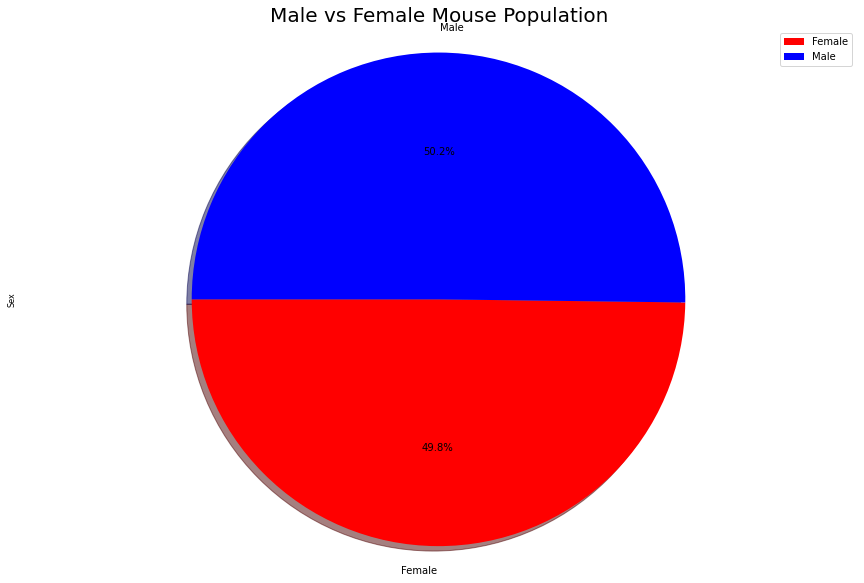

In [444]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas


colors = ['r', 'b']
explode = (0, 0)
plot = mouse_gender.plot.pie(y='Total Count',figsize=(15,10), colors = colors, 
                             startangle=180, explode = explode, shadow = True, autopct="%1.1f%%")

plt.title('Male vs Female Mouse Population',fontsize = 20)
plt.ylabel('Sex',fontsize = 8)


plt.axis("equal")

Text(0, 0.5, 'Sex')

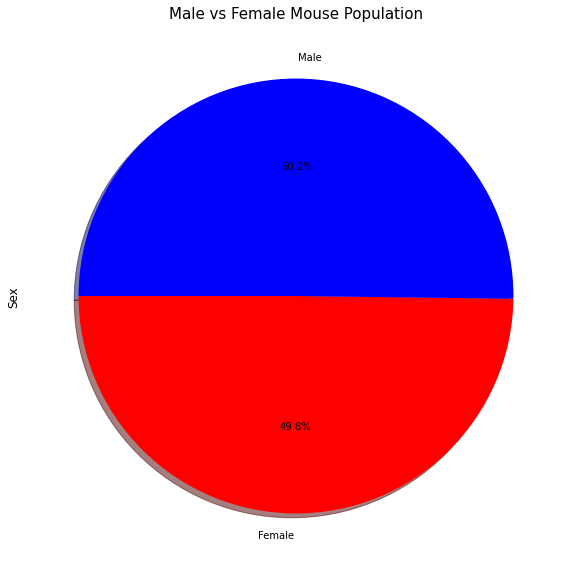

In [445]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ["Female","Male"]

#List the values of each section of the pie chart
sizes = [49.799197,50.200803]

#Set colors for each section of the pie
colors = ['r', 'b']

#Determoine which section of the circle to detach
explode = (0, 0)

#Create the pie chart based upon the values 
fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.pie(sizes, explode=explode,labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=180,)
plt.title('Male vs Female Mouse Population',fontsize = 15)
plt.ylabel('Sex',fontsize = 12)
#Set equal axis



## Quartiles, Outliers and Boxplots

In [446]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds

Capomulin_df = mousestudy_combined.loc[mousestudy_combined["Drug Regimen"] == "Capomulin",:]
Ramicane_df = mousestudy_combined.loc[mousestudy_combined["Drug Regimen"] == "Ramicane", :]
Infubinol_df = mousestudy_combined.loc[mousestudy_combined["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = mousestudy_combined.loc[mousestudy_combined["Drug Regimen"] == "Ceftamin", :]

# Capomulin
Capomulin_last = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Capomulin_vol = pd.DataFrame(Capomulin_last)
Capomulin_merge = pd.merge(Capomulin_vol, mousestudy_combined, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [447]:
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Capomulin_tumors = Capomulin_merge["Tumor Volume (mm3)"]

quartiles =Capomulin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Capomulin tumors: {lowerq}")
print(f"The upper quartile of Capomulin tumors: {upperq}")
print(f"The interquartile range of Capomulin tumors: {iqr}")
print(f"The median of Capomulin tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Capomulin tumors: 32.37735684
The upper quartile of Capomulin tumors: 40.1592203
The interquartile range of Capomulin tumors: 7.781863460000004
The median of Capomulin tumors: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [448]:
#Ramicane

Capomulin_df = mousestudy_combined.loc[mousestudy_combined["Drug Regimen"] == "Capomulin",:]
Ramicane_df = mousestudy_combined.loc[mousestudy_combined["Drug Regimen"] == "Ramicane", :]
Infubinol_df = mousestudy_combined.loc[mousestudy_combined["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = mousestudy_combined.loc[mousestudy_combined["Drug Regimen"] == "Ceftamin", :]

# Ramicane
Ramicane_last = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
Ramicane_vol = pd.DataFrame(Ramicane_last)
Ramicane_merge = pd.merge(Ramicane_vol, mousestudy_combined, on=("Mouse ID","Timepoint"),how="left")
Ramicane_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [449]:
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Ramicane_tumors = Ramicane_merge["Tumor Volume (mm3)"]

quartiles =Ramicane_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Ramicane tumors: {lowerq}")
print(f"The upper quartile of Ramicane tumors: {upperq}")
print(f"The interquartile range of Ramicane tumors: {iqr}")
print(f"The median of Ramicane tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ramicane tumors: 31.56046955
The upper quartile of Ramicane tumors: 40.65900627
The interquartile range of Ramicane tumors: 9.098536719999998
The median of Ramicane tumors: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [450]:
#infubinol

Capomulin_df = mousestudy_combined.loc[mousestudy_combined["Drug Regimen"] == "Capomulin",:]
Ramicane_df = mousestudy_combined.loc[mousestudy_combined["Drug Regimen"] == "Ramicane", :]
Infubinol_df = mousestudy_combined.loc[mousestudy_combined["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = mousestudy_combined.loc[mousestudy_combined["Drug Regimen"] == "Ceftamin", :]


Infubinol_last = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
Infubinol_vol = pd.DataFrame(Infubinol_last)
Infubinol_merge = pd.merge(Infubinol_vol, mousestudy_combined, on=("Mouse ID","Timepoint"),how="left")
Infubinol_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [451]:
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Infubinol_tumors = Infubinol_merge["Tumor Volume (mm3)"]

quartiles = Infubinol_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of infubinol tumors: {lowerq}")
print(f"The upper quartile of infubinol tumors: {upperq}")
print(f"The interquartile range of infubinol tumors: {iqr}")
print(f"The median of infubinol tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of infubinol tumors: 54.04860769
The upper quartile of infubinol tumors: 65.52574285
The interquartile range of infubinol tumors: 11.477135160000003
The median of infubinol tumors: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [452]:
#Ceftamin

Capomulin_df = mousestudy_combined.loc[mousestudy_combined["Drug Regimen"] == "Capomulin",:]
Ramicane_df = mousestudy_combined.loc[mousestudy_combined["Drug Regimen"] == "Ramicane", :]
Infubinol_df = mousestudy_combined.loc[mousestudy_combined["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = mousestudy_combined.loc[mousestudy_combined["Drug Regimen"] == "Ceftamin", :]


Ceftamin_last = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']
Ceftamin_vol = pd.DataFrame(Ceftamin_last)
Ceftamin_merge = pd.merge(Ceftamin_vol, mousestudy_combined, on=("Mouse ID","Timepoint"),how="left")
Ceftamin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [453]:
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Ceftamin_tumors = Ceftamin_merge["Tumor Volume (mm3)"]

quartiles = Ceftamin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Ceftamin tumors: {lowerq}")
print(f"The upper quartile of Ceftamin tumors: {upperq}")
print(f"The interquartile range of Ceftamin tumors: {iqr}")
print(f"The median of Ceftamin tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ceftamin tumors: 48.72207785
The upper quartile of Ceftamin tumors: 64.29983003
The interquartile range of Ceftamin tumors: 15.577752179999997
The median of Ceftamin tumors: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


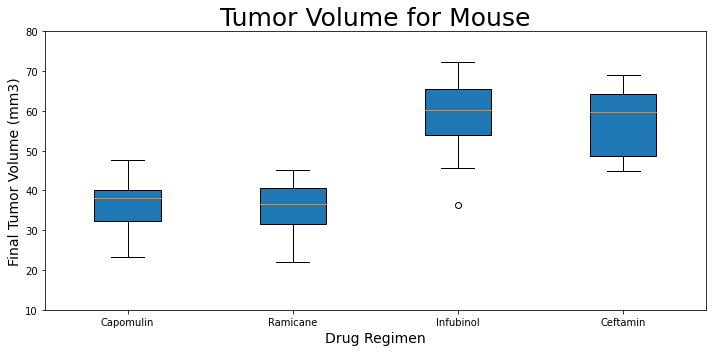

In [454]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

data_to_plot = [Capomulin_tumors, Ramicane_tumors, Infubinol_tumors, Ceftamin_tumors]
Regimen= ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

fig1, ax1 = plt.subplots(figsize=(10, 5))
ax1.set_title('Tumor Volume for Mouse',fontsize =25)
ax1.set_ylabel('Final Tumor Volume (mm3)',fontsize = 14)
ax1.set_xlabel('Drug Regimen',fontsize = 14)
ax1.boxplot(data_to_plot, labels=Regimen, widths = 0.4, patch_artist=True,vert=True)

plt.ylim(10, 80)
plt.tight_layout()

## Line and Scatter Plots

In [455]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin. I chose g316 for my plot

forline_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "g316",:]
forline_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
351,g316,Capomulin,Female,22,22,0,45.000000,0
352,g316,Capomulin,Female,22,22,5,44.022752,0
353,g316,Capomulin,Female,22,22,10,44.502042,0
354,g316,Capomulin,Female,22,22,15,45.216743,0
355,g316,Capomulin,Female,22,22,20,45.933322,1


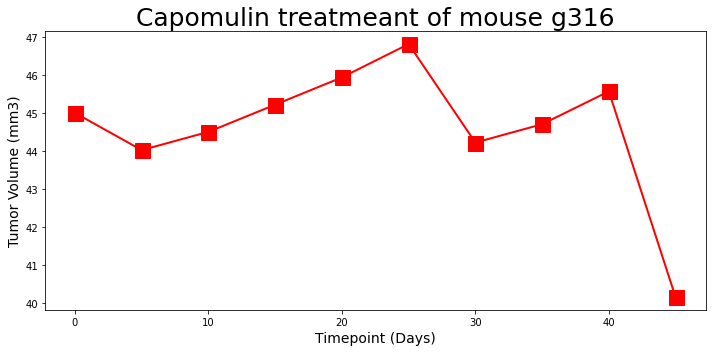

In [456]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

x_axis = forline_df["Timepoint"]
tumsiz = forline_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots(figsize=(10, 5))
plt.title('Capomulin treatmeant of mouse g316',fontsize =25)
plt.plot(x_axis, tumsiz,linewidth=2, markersize=15,marker="s",color="r", label="Fahreneit")
plt.xlabel('Timepoint (Days)',fontsize =14)
plt.ylabel('Tumor Volume (mm3)',fontsize =14)

plt.tight_layout()
plt.show()

## Correlation and Regression

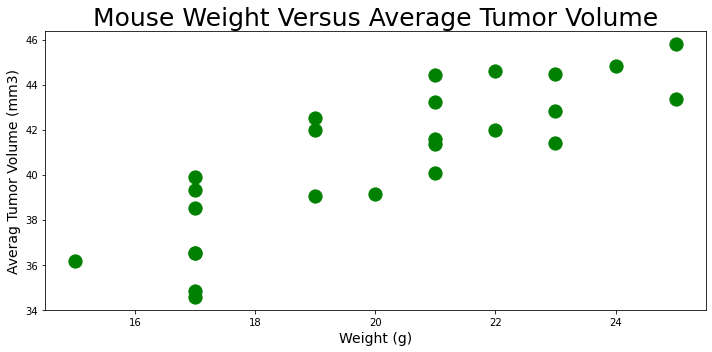

In [457]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

fig1, ax1 = plt.subplots(figsize=(10, 5))
avg_capm_vol =Capomulin_df.groupby(['Mouse ID']).mean()

marker_size=15
plt.scatter(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'],s=175, color="g")
plt.title('Mouse Weight Versus Average Tumor Volume',fontsize =25)
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Averag Tumor Volume (mm3)',fontsize =14)
plt.tight_layout()

In [458]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr=round(st.pearsonr(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")

The correlation between mouse weight and average tumor volume is 0.84


In [459]:
# Imported a dependency for regression line

from scipy.stats import linregress

In [460]:
x_values = avg_capm_vol['Weight (g)']
y_values = avg_capm_vol['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"pandas (Correlation coefficient):{corr}")
print(f"stderr:{stderr}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)

slope:0.9544396890241049
intercept:21.552160532685008
rvalue (Correlation coefficient):0.8419363424694721
pandas (Correlation coefficient):0.84
stderr:0.12754359033201323
y = 0.95x + 21.55


The r-squared is: 0.7088568047708723


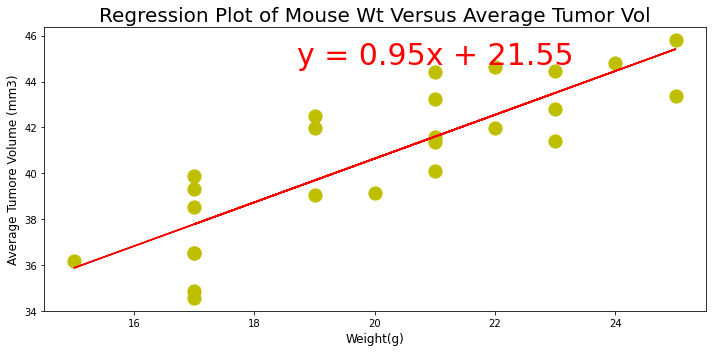

In [461]:
# Add the linear regression equation and line to plot
fig1, ax1 = plt.subplots(figsize=(10, 5))
plt.scatter(x_values,y_values,s=175, color="y")
plt.plot(x_values,regress_values,"r-")
plt.title('Regression Plot of Mouse Wt Versus Average Tumor Vol',fontsize =20)
plt.xlabel('Weight(g)',fontsize =12)
plt.ylabel('Average Tumore Volume (mm3)',fontsize =12)
ax1.annotate(line_eq, xy=(20, 40), xycoords='data',xytext=(0.8, 0.95), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',fontsize=30,color="red")

print(f"The r-squared is: {rvalue**2}")

plt.tight_layout()
plt.show()

# Observations 

1. Based on data -  Capomulin and Ramicane reduces the size of tumors better.

2. There is a strong positive correlation between mouse weight and average tumor volume shown in the correlation graph. This means when the mouse weight increases the average tumor volume also increases.

3. Capomulin was the maximum administered drug regimen. 